# Atividade Prática 09

Isabella Menezes Ramos - 3474

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

In [3]:
iris_df['target'] = iris_df['target'].astype('int64')

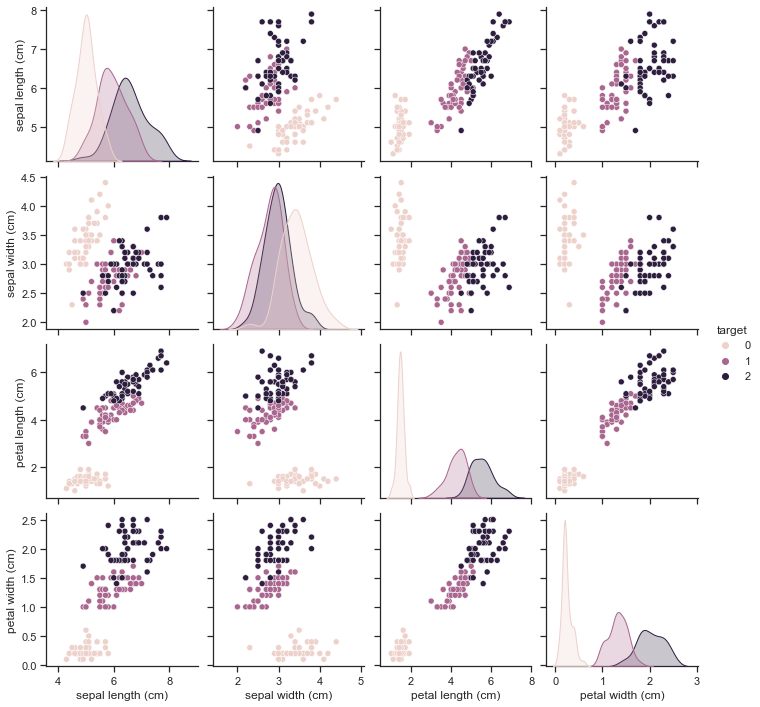

In [4]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue="target")
plt.show()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split( 
    iris_df[[u'sepal length (cm)',u'sepal width (cm)',u'petal length (cm)', u'petal width (cm)']],
    iris_df[u'target'],
    test_size = 0.2, random_state=0
)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print("Accuracy = {0}%".format(100*np.sum(knn.predict(X_test) == Y_test)/len(Y_test)))

Accuracy = 96.66666666666667%


In [8]:
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)
print("Accuracy = {0}%".format(100*np.sum(svm.predict(X_test) == Y_test)/len(Y_test)))

Accuracy = 100.0%


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,
    iris_df[[u'sepal length (cm)',u'sepal width (cm)',u'petal length (cm)', u'petal width (cm)']],
    iris_df[u'target'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))

Accuracy: 0.97 (+/- 0.05)


In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm,
    iris_df[[u'sepal length (cm)',u'sepal width (cm)',u'petal length (cm)', u'petal width (cm)']],
    iris_df[u'target'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))

Accuracy: 0.98 (+/- 0.03)


In [12]:
from sklearn import metrics

y_pred_class = knn.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [13]:
y_pred_class = svm.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas
ao clima da cidade de Szede, Hungria, entre 2006 e 2016.
1. Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo
de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e
responda:

## a) Qual a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo testado? Existe algum algoritmo com resultados melhores?

In [14]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [40]:
df = df.dropna()
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [41]:
X = df
X = X.drop(columns=['Precip Type','Formatted Date','Summary','Daily Summary']) 
y = df['Precip Type']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split( 
    X,y,
    test_size = 0.2, random_state=0
)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print("Accuracy = {0}%".format(100*np.sum(knn.predict(X_test) == Y_test)/len(Y_test)))

Accuracy = 98.08734625807797%


In [57]:
y_pred_class_knn = knn.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

        rain       0.99      1.00      1.00     17026
        snow       1.00      0.93      0.96      2162

    accuracy                           0.99     19188
   macro avg       1.00      0.96      0.98     19188
weighted avg       0.99      0.99      0.99     19188



In [44]:
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)
print("Accuracy = {0}%".format(100*np.sum(svm.predict(X_test) == Y_test)/len(Y_test)))

Accuracy = 99.89576818845111%


In [58]:
y_pred_class_svm = svm.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

        rain       0.99      1.00      1.00     17026
        snow       1.00      0.93      0.96      2162

    accuracy                           0.99     19188
   macro avg       1.00      0.96      0.98     19188
weighted avg       0.99      0.99      0.99     19188



In [46]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
print("Accuracy = {0}%".format(100*np.sum(clf.predict(X_test) == Y_test)/len(Y_test)))

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Accuracy = 99.16614550760892%


In [59]:
y_pred_class_clf = clf.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

        rain       0.99      1.00      1.00     17026
        snow       1.00      0.93      0.96      2162

    accuracy                           0.99     19188
   macro avg       1.00      0.96      0.98     19188
weighted avg       0.99      0.99      0.99     19188



O algoritmo SVM apresentou melhores resultados.

## b) É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés de utilizar todos?

Sim, quanto melhor selecionar as variáveis, que tiver maior relação com target, melhor será o desempenho do algoritmo.

## c) Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais lento? E qual foi o mais rápido?

Sim, o algoritmo KNN teve o menor tempo de processamento, já o algoritmo SVM teve o maior tempo de processamento.

## d) Mostre a matriz de confusão para os resultados (pesquise como fazer isso).

In [56]:
classes = ['rain','snow']

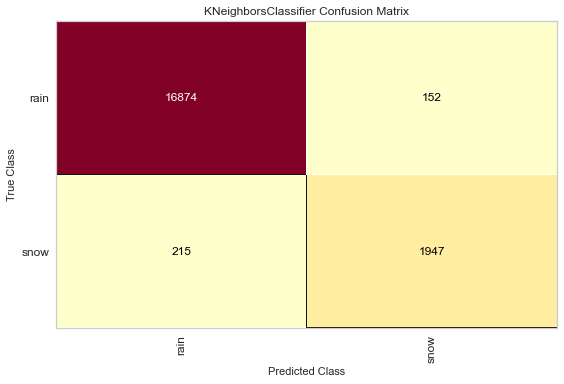

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn,classes = classes)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.show()

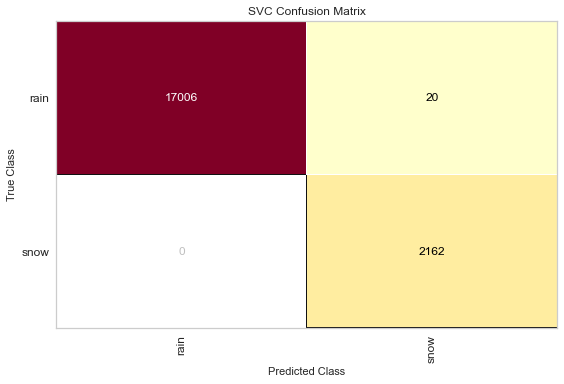

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [64]:
cm = ConfusionMatrix(svm,classes = classes)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.show()

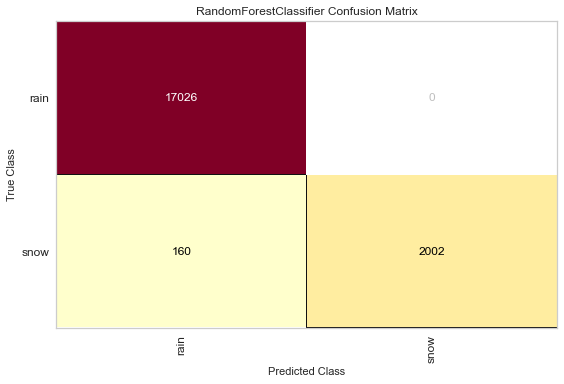

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [66]:
cm = ConfusionMatrix(clf,classes = classes)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)
cm.show()